# Marketing Lab (Dimensionality Reduction)

**Learning Objectives:**
  * Apply Dimensionality Reduction Techniques
  * Gain exposure to marketing related DataSets

## Context of the Analysis

### Context- A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only  499 US Dollars ($999 on other days). It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
### Objective - The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.


### About this file
This data was gathered during last year's campaign.
#### Data description is as follows;

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* ID - Unique ID of each customer
* Year_Birth - Age of the customer
* Complain - 1 if the customer complained in the last 2 years
* Dt_Customer - date of customer's enrollment with the company
* Education - customer's level of education
* Marital - customer's marital status
* Kidhome - number of small children in customer's household
* Teenhome - number of teenagers in customer's household
* Income - customer's yearly household income
* MntFishProducts - the amount spent on fish products in the last 2 years
* MntMeatProducts - the amount spent on meat products in the last 2 years
* MntFruits - the amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - the amount spent on wine products in the last 2 years
* MntGoldProds - the amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through the company's website
* NumWebVisitsMonth - number of visits to company's website in the last month
* Recency - number of days since the last purchase

## 1. Library Import

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np
from scipy import stats
import warnings

In [3]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [4]:
Data=pd.read_csv("https://raw.githubusercontent.com/thousandoaks/Maths4DS-III/refs/heads/main/datasets/superstore_data.csv")


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
Data.sample(3).T

,313,1244,1046
Id,10681,2798,7059
Year_Birth,1970,1977,1963
Education,2n Cycle,PhD,Graduation
Marital_Status,Married,Together,Married
Income,62466.0,102160.0,80124.0
Kidhome,0,0,0
Teenhome,1,0,0
Dt_Customer,1/15/2014,2/11/2012,6/26/2014
Recency,13,54,47
MntWines,129,763,483


## 3. Data Transformation

In [7]:
## We set date related columns as datetimes




In [8]:
# prompt: convert Year_Birth and Dt_Customer to datetimes

# Convert 'Year_Birth' to datetime, assuming it represents the year of birth
Data['Year_Birth'] = pd.to_datetime(Data['Year_Birth'], format='%Y', errors='coerce')

# Convert 'Dt_Customer' to datetime, assuming it's in a standard date format (you might need to adjust the format)
Data['Dt_Customer'] = pd.to_datetime(Data['Dt_Customer'], errors='coerce')


In [9]:
Data.sample(3).T

,2108,928,1016
Id,8970,8783,7629
Year_Birth,1972-01-01 00:00:00,1950-01-01 00:00:00,1977-01-01 00:00:00
Education,PhD,Graduation,Graduation
Marital_Status,Married,Married,Married
Income,62010.0,57045.0,22108.0
Kidhome,0,0,1
Teenhome,1,1,1
Dt_Customer,2012-10-23 00:00:00,2012-08-09 00:00:00,2014-08-05 00:00:00
Recency,93,40,46
MntWines,371,296,5


In [10]:
## We remove customers being born before 1940 as they are probably ouliers

AgeFilter=Data['Year_Birth']>='1940-01-01'

In [11]:
Data[~AgeFilter]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
513,11004,1893-01-01,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,7,0,2,1,1,0,2,4,0,0
827,1150,1899-01-01,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,104,64,224,1,4,6,4,1,0,0
2233,7829,1900-01-01,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,7,4,25,1,2,1,2,5,0,1


In [12]:
# We order the column Dt_Customer_New to determine who is the most recent customer, that defines the most recent date
Data['Dt_Customer'].sort_values()

,Dt_Customer
1509,2012-01-08
2222,2012-01-08
455,2012-01-08
1398,2012-01-08
2239,2012-01-09
...,...
667,2014-12-05
52,2014-12-05
434,2014-12-05
1569,2014-12-05


In [13]:
# We compute the number of days customers have been with the company based on the most recent date 2015-01-01
Data['TimeWithUs']=Data['Dt_Customer'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['MonthsWithUs']=Data['TimeWithUs']/np.timedelta64(30, "D")

In [14]:
## We compute the age of the customer based on the most recent date 2015-01-01

Data['Age']=Data['Year_Birth'].apply(lambda x:pd.to_datetime('2015-01-01')-x)
Data['AgeYears']=Data['Age']/np.timedelta64(365, "D")

In [15]:
SuperStore=Data[AgeFilter]
SuperStore.sample(3).T

,1199,952,1909
Id,9952,3602,1490
Year_Birth,1947-01-01 00:00:00,1958-01-01 00:00:00,1962-01-01 00:00:00
Education,Master,Master,Graduation
Marital_Status,Together,Married,Married
Income,78093.0,51412.0,55759.0
Kidhome,0,0,0
Teenhome,0,1,1
Dt_Customer,2013-11-12 00:00:00,2013-12-31 00:00:00,2012-11-28 00:00:00
Recency,53,42,84
MntWines,368,140,675


## 4. LLE

In [16]:
SuperStore.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'TimeWithUs', 'MonthsWithUs', 'Age',
       'AgeYears'],
      dtype='object')

In [18]:
SuperStore.head(2)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,TimeWithUs,MonthsWithUs,Age,AgeYears
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,4,6,1,1,0,199 days,6.633333,16436 days,45.030137
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,3,7,5,1,0,200 days,6.666667,19723 days,54.035616


In [48]:
Features=['Education','Marital_Status','Income','Kidhome','Teenhome','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain',  'MonthsWithUs','AgeYears']

In [49]:
X=SuperStore[Features]

In [50]:
# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns # Select columns with 'object' dtype
categorical_features

Index(['Education', 'Marital_Status'], dtype='object')

In [51]:
from sklearn.preprocessing import OrdinalEncoder
# Create an OrdinalEncoder
enc = OrdinalEncoder()

# Fit and transform the categorical features
X[categorical_features] = enc.fit_transform(X[categorical_features])
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,MonthsWithUs,AgeYears
0,2.0,2.0,84835.0,0,0,0,189,104,379,111,...,218,1,4,4,6,1,1,0,6.633333,45.030137
1,2.0,4.0,57091.0,0,0,0,464,5,64,7,...,37,1,7,3,7,5,1,0,6.666667,54.035616
2,2.0,3.0,67267.0,0,1,0,134,11,59,15,...,30,1,3,2,5,2,0,0,7.766667,57.038356
3,2.0,5.0,32474.0,1,1,0,10,0,1,0,...,0,1,1,0,2,7,0,0,1.900000,48.032877
4,2.0,4.0,21474.0,1,0,0,6,16,24,11,...,34,2,3,1,2,7,1,0,5.000000,26.016438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4.0,2.0,66476.0,0,1,99,372,18,126,47,...,78,2,5,2,11,4,0,0,18.233333,39.027397
2236,0.0,3.0,31056.0,1,0,99,5,10,13,3,...,16,1,1,0,3,8,0,0,23.633333,38.024658
2237,2.0,2.0,46310.0,1,0,99,185,2,88,15,...,14,2,6,1,5,8,0,0,34.166667,39.027397
2238,2.0,3.0,65819.0,0,0,99,267,38,701,149,...,63,1,5,4,10,3,0,0,25.433333,37.024658


In [52]:
# prompt: count NaN in X

nan_count = X.isnull().sum().sum()
print(f"The total number of NaN values in X is: {nan_count}")

The total number of NaN values in X is: 24


In [53]:
# prompt: drop NaN in X

X = X.dropna()

In [59]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=100)
X_transformed = lle.fit_transform(X)

In [60]:
X_transformed

array([[ 0.0309822 ,  0.01544311, -0.00984466],
       [ 0.00494207, -0.01753884,  0.0004707 ],
       [ 0.01464894, -0.01195745, -0.01680187],
       ...,
       [-0.00558364, -0.01420058,  0.0208148 ],
       [ 0.01333706, -0.01304367, -0.01522463],
       [ 0.04050534,  0.03508124,  0.0073111 ]])

In [61]:
len(X_transformed)

2213

In [62]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,MonthsWithUs,AgeYears
0,2.0,2.0,84835.0,0,0,0,189,104,379,111,...,218,1,4,4,6,1,1,0,6.633333,45.030137
1,2.0,4.0,57091.0,0,0,0,464,5,64,7,...,37,1,7,3,7,5,1,0,6.666667,54.035616
2,2.0,3.0,67267.0,0,1,0,134,11,59,15,...,30,1,3,2,5,2,0,0,7.766667,57.038356
3,2.0,5.0,32474.0,1,1,0,10,0,1,0,...,0,1,1,0,2,7,0,0,1.900000,48.032877
4,2.0,4.0,21474.0,1,0,0,6,16,24,11,...,34,2,3,1,2,7,1,0,5.000000,26.016438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,4.0,2.0,66476.0,0,1,99,372,18,126,47,...,78,2,5,2,11,4,0,0,18.233333,39.027397
2236,0.0,3.0,31056.0,1,0,99,5,10,13,3,...,16,1,1,0,3,8,0,0,23.633333,38.024658
2237,2.0,2.0,46310.0,1,0,99,185,2,88,15,...,14,2,6,1,5,8,0,0,34.166667,39.027397
2238,2.0,3.0,65819.0,0,0,99,267,38,701,149,...,63,1,5,4,10,3,0,0,25.433333,37.024658


In [63]:
fig = px.scatter(X_transformed, x=X_transformed[:, 0], y=X_transformed[:, 1], color=X['Response'],labels={"x": "X0","y": "X1"})
fig.show()

In [64]:
fig = px.scatter(X_transformed, x=X_transformed[:, 0], y=X_transformed[:, 2], color=X['Response'],labels={"x": "X0","y": "X2"})
fig.show()

In [66]:
fig = px.scatter(X_transformed, x=X_transformed[:, 1], y=X_transformed[:, 2], color=X['Response'],labels={"x": "X1","y": "X2"})
fig.show()

## 5. t-SNE

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto")
%time X_reduced = tsne.fit_transform(X)

CPU times: user 19.5 s, sys: 46.5 ms, total: 19.6 s
Wall time: 22.4 s


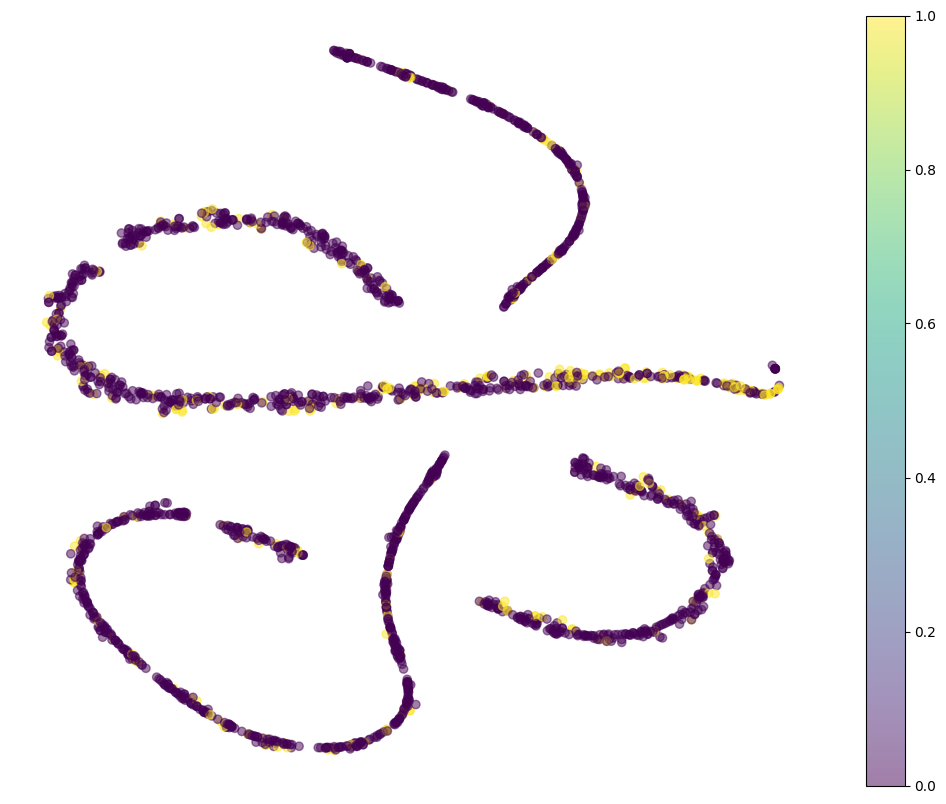

In [75]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=X['Response'],  alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

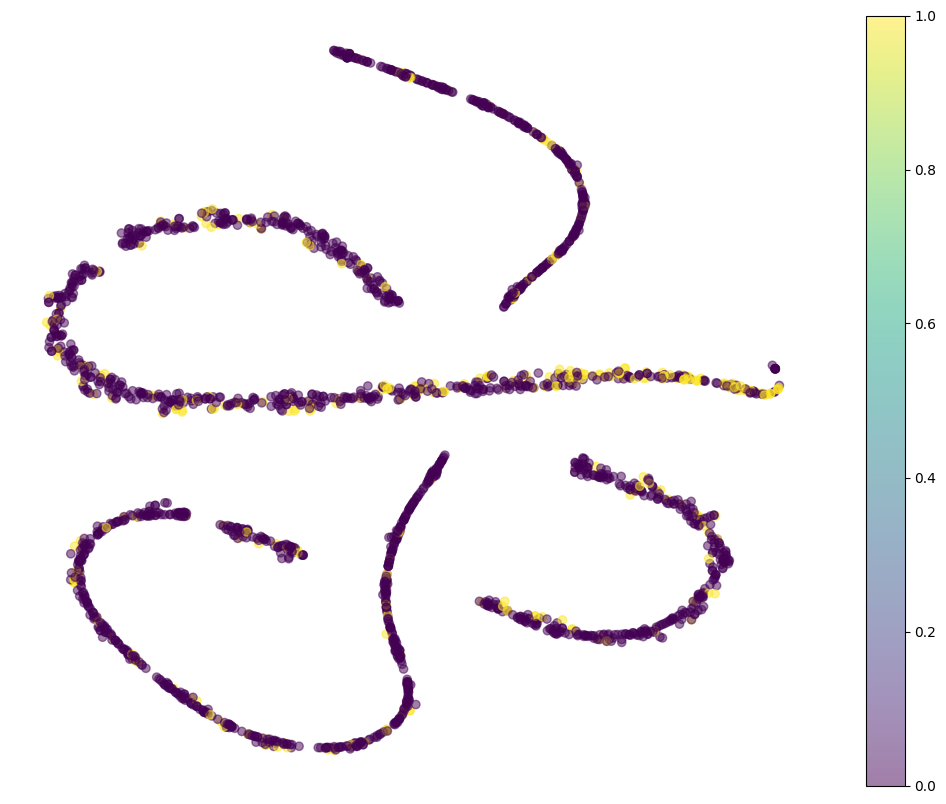

In [76]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=X['Response'],  alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

## 6. UMAP
